<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#What-does-a-max-pooling-operation?" data-toc-modified-id="What-does-a-max-pooling-operation?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>What does a max-pooling operation?</a></span></li><li><span><a href="#Are-all-libraries-that-are-needed-available?" data-toc-modified-id="Are-all-libraries-that-are-needed-available?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Are all libraries that are needed available?</a></span></li><li><span><a href="#Load-an-example-image-and-display-it" data-toc-modified-id="Load-an-example-image-and-display-it-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load an example image and display it</a></span></li><li><span><a href="#Keras-model-with-a-max-pooling-layer" data-toc-modified-id="Keras-model-with-a-max-pooling-layer-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Keras model with a max-pooling layer</a></span></li><li><span><a href="#Filtering-an-image-with-max-pooling" data-toc-modified-id="Filtering-an-image-with-max-pooling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Filtering an image with max-pooling</a></span></li></ul></div>

# What does a max-pooling operation?

This notebook shall help to answer this question, since convolution and max-pooling are the two core operations of a ConvNet.

# Are all libraries that are needed available?

In [1]:
import numpy as np
import tensorflow as tf
import keras
import cv2
import matplotlib.pyplot as plt

print( "Your NumPy version is: " + np.__version__ )
print( "Your TensorFlow version is: " + tf.__version__)
print( "Your Keras version is: " + keras.__version__ )
print( "Your OpenCV version is: " + cv2.__version__ )

Using TensorFlow backend.


Your NumPy version is: 1.16.2
Your TensorFlow version is: 1.13.1
Your Keras version is: 2.2.4
Your OpenCV version is: 4.1.0


# Load an example image and display it

Here we will specify an example image filename. We will use OpenCV to read the image in. Then we covert it to gray-scale and resize it to IMG_SIZE. We then use OpenCV's imshow() function to display the image.

For making sure, the image is shown in its real size, we have to specify Matplotlib to use a certain figure size. Since the figure size is specified in inches and not in pixel, we first determine the "dots per inch" (DPI) currently used by the figure object.

image has shape (800, 800, 3)
image has now shape (800, 800)
DPI= 72.0


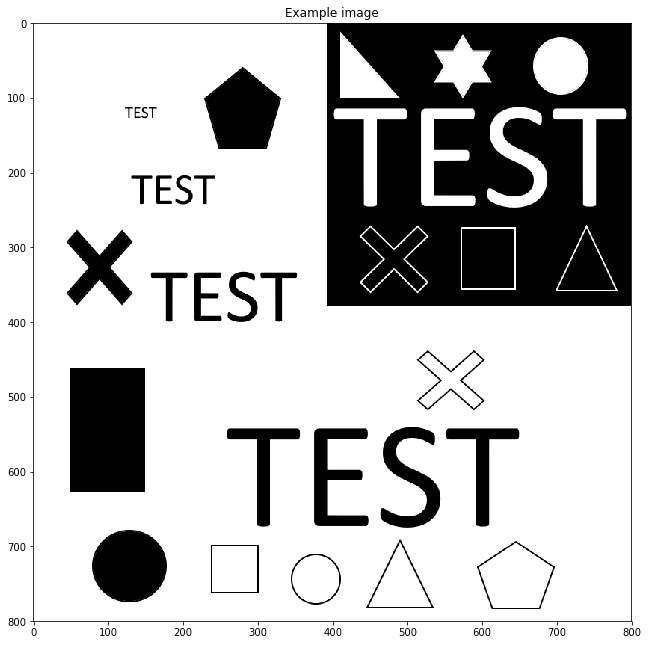

In [10]:
IMG_SIZE = (800,800)

filename = "data/filter_test.png"

# ",0" means: read the image as a gray-scale image
image = cv2.imread(filename)
print("image has shape", image.shape)

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("image has now shape", image.shape)
image = cv2.resize(image, IMG_SIZE)
image = image * (1.0 / 255.0)

# Try to set figure size to exact
# image size in pixels...
# Not that easy, since:
# Matplotlib specifies figure size
# in inches, not in pixels!
DPI = plt.figure().get_dpi()
print("DPI=", DPI)
fig_height = int(image.shape[0]/DPI)
fig_width  = int(image.shape[1]/DPI)
plt.figure(figsize=(fig_width, fig_height))

# display the image as a gray-scale image
plt.imshow(image, cmap='gray')
plt.title("Example image")
plt.show()

# Keras model with a max-pooling layer

Now we build a small Keras model where we have just one max-pooling layer. The max-pooling operation has two hyper-parameters: the filter size and the stride of the filter.

Here we do not "compile" the model, but just "build" it, since no training of the filter will be done.

In [11]:
from keras.models import Sequential
from keras import layers
from keras import backend as K
from keras.layers.convolutional import MaxPooling2D

NR_IMG_CHANNELS = 1
HYPPARAM_POOL_SIZE = (2,2)
HYPPARAM_STRIDE = (2,2)
THE_INPUT_SHAPE = (IMG_SIZE[0], IMG_SIZE[1], NR_IMG_CHANNELS)

K.clear_session()

model = Sequential()

model.add(MaxPooling2D(pool_size=HYPPARAM_POOL_SIZE,
                       strides=HYPPARAM_STRIDE,
                       padding="valid"
                       )
         )

#model.compile(optimizer="sgd")
model.build()

# Filtering an image with max-pooling

Now we reshape the OpenCV image just loaded in before in order to put it as input to the Keras model. When we call predict() the image will be max-pooled.

The resulting tensor is stored in filter_result. Since the tensor has a 4D shape, we extract the first feature map from this filter result tensor. This is also the only feature map that we have. The max-pooling filter result (feature map) is then displayed as a gray-scaled image.

filter_result has shape (1, 400, 400, 1)
DPI= 72.0


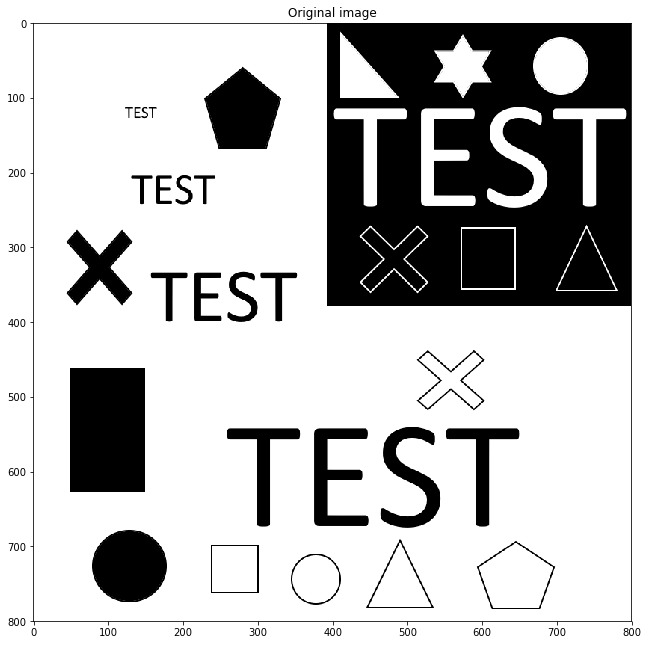

Min/Max value in orginal image is 0.0/1.0


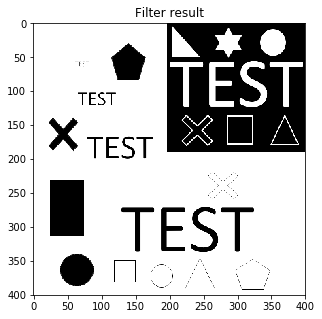

Min/Max value in feature_map1 is 0.0/1.0


In [12]:
# 1.
# Prepare input for the CNN, since
# input for the model has to be 4-dimensional
nr_images = 1
nr_channels = 1
input_for_conv_net = image.reshape(nr_images,
                                   image.shape[0],
                                   image.shape[1],
                                   nr_channels)

# 2.
# Filter image!
filter_result = model.predict(input_for_conv_net)

# 3.
# Show the shape of the resulting output tensor
print("filter_result has shape", filter_result.shape)

# 4.
# Visualize filter results
tensor_height = filter_result.shape[1]
tensor_width  = filter_result.shape[2]
feature_map1 = filter_result[:,:,:,0].reshape((tensor_height,tensor_width))

# Try to set figure size to exact
# image size in pixels...
# Not that easy, since:
# Matplotlib specifies figure size
# in inches, not in pixels!
DPI = plt.figure().get_dpi()
print("DPI=", DPI)
fig_height = int(image.shape[0]/DPI)
fig_width  = int(image.shape[1]/DPI)
plt.figure(figsize=(fig_width, fig_height))

# Show original image
plt.imshow(image, cmap='gray')
plt.title("Original image")
plt.show()
print("Min/Max value in orginal image is {}/{}".
      format(np.amin(image), np.amax(image)) )

# Show max pool filter result image
fig_height = int(feature_map1.shape[0]/DPI)
fig_width  = int(feature_map1.shape[1]/DPI)
plt.figure(figsize=(fig_width, fig_height))
plt.imshow(feature_map1, cmap='gray')
plt.title("Filter result")
plt.savefig("maxpool_filter_result.png")
plt.show()
print("Min/Max value in feature_map1 is {}/{}".
      format(np.amin(feature_map1), np.amax(feature_map1)) )


In [ ]:
# 